EN3150 - Pattern Recognition

Learning from data and related challenges and linear models for regression - Assignment 1

220257N

Jayasekara S.P.R

In [ ]:

#importing the required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MaxAbsScaler, StandardScaler, MinMaxScaler



Question 1

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
Slope: -3.56
Intercept: 3.92


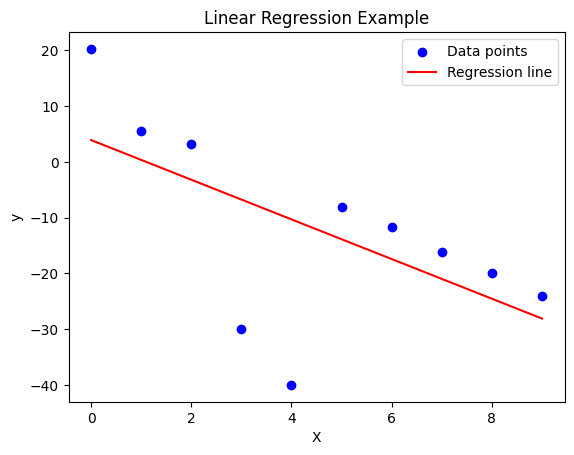

In [ ]:
X = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y = np.array([20.26,5.61,3.14,-30,-40,-8.13,-11.73,-16.08,-19.95,-24.03]) 
N = 10
# creating and training the model
model = LinearRegression()
model.fit(X, y)

# predicting values
y_pred = model.predict(X)

print(f"Slope: {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# plotting
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Example")
plt.legend()
plt.show()



The model predicted by sklearn is y = -3.56x + 3.92

In [ ]:
beta = [1,1e-6,1e3]
X = X.flatten()

# function to compute loss
def compute_loss(intercept, slope, beta):
    predictions = slope * X + intercept 
    residuals = y - predictions
    loss = np.mean(residuals**2 / (residuals**2 + beta**2))
    return loss

#getting the loss for y = -4x + 12
for b in beta:
    loss_calc = compute_loss(12,-4,b)    
    print(f'for beta = {b} loss is = {loss_calc}')     
print('         ')


#getting the loss for y = -3.55 x + 3.91

for b in beta:
    loss_calc = compute_loss(3.91,-3.55,b)    
    print(f'for beta = {b} loss is = {loss_calc}')      



[0 1 2 3 4 5 6 7 8 9]
for beta = 1 loss is = 0.435416262490386
for beta = 1e-06 loss is = 0.9999999998258206
for beta = 1000.0 loss is = 0.0002268287498440988
         
for beta = 1 loss is = 0.9728470518681676
for beta = 1e-06 loss is = 0.9999999999999718
for beta = 1000.0 loss is = 0.00018824684654645654


Question 2

In [ ]:
predictions = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])

y_true = 1  

# equation for mse
mse_values = (y_true - predictions) ** 2

# small value to avoid log(0) errors
e = 1e-15

# equation for bce
bce_values = -(y_true * np.log(predictions + e ) + (1 - y_true) * np.log(1 - predictions + e))

for i in range(len(predictions)):
    print(f'Prediction Value = {predictions[i]:.3f} MSE = {mse_values[i]:.3f} BCE = {bce_values[i]:.3f}')

Prediction Value = 0.005 MSE = 0.990 BCE = 5.298
Prediction Value = 0.010 MSE = 0.980 BCE = 4.605
Prediction Value = 0.050 MSE = 0.902 BCE = 2.996
Prediction Value = 0.100 MSE = 0.810 BCE = 2.303
Prediction Value = 0.200 MSE = 0.640 BCE = 1.609
Prediction Value = 0.300 MSE = 0.490 BCE = 1.204
Prediction Value = 0.400 MSE = 0.360 BCE = 0.916
Prediction Value = 0.500 MSE = 0.250 BCE = 0.693
Prediction Value = 0.600 MSE = 0.160 BCE = 0.511
Prediction Value = 0.700 MSE = 0.090 BCE = 0.357
Prediction Value = 0.800 MSE = 0.040 BCE = 0.223
Prediction Value = 0.900 MSE = 0.010 BCE = 0.105
Prediction Value = 1.000 MSE = 0.000 BCE = -0.000


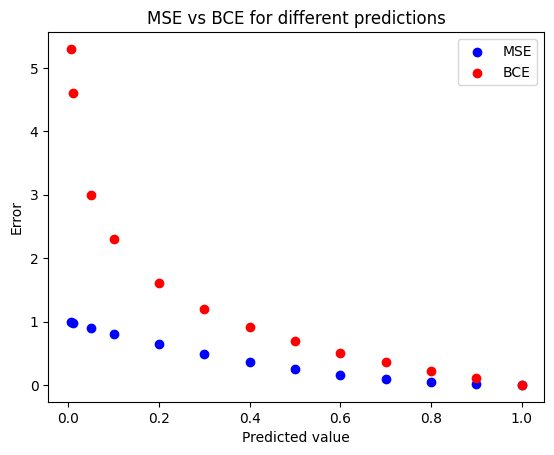

In [ ]:
# plotting the scatter plot
plt.scatter(predictions, mse_values, color='blue', label='MSE')
plt.scatter(predictions, bce_values, color='red', label='BCE')

plt.xlabel("Predicted value")
plt.ylabel("Error")
plt.title("MSE vs BCE for different predictions")
plt.legend()
plt.show()

Question 3

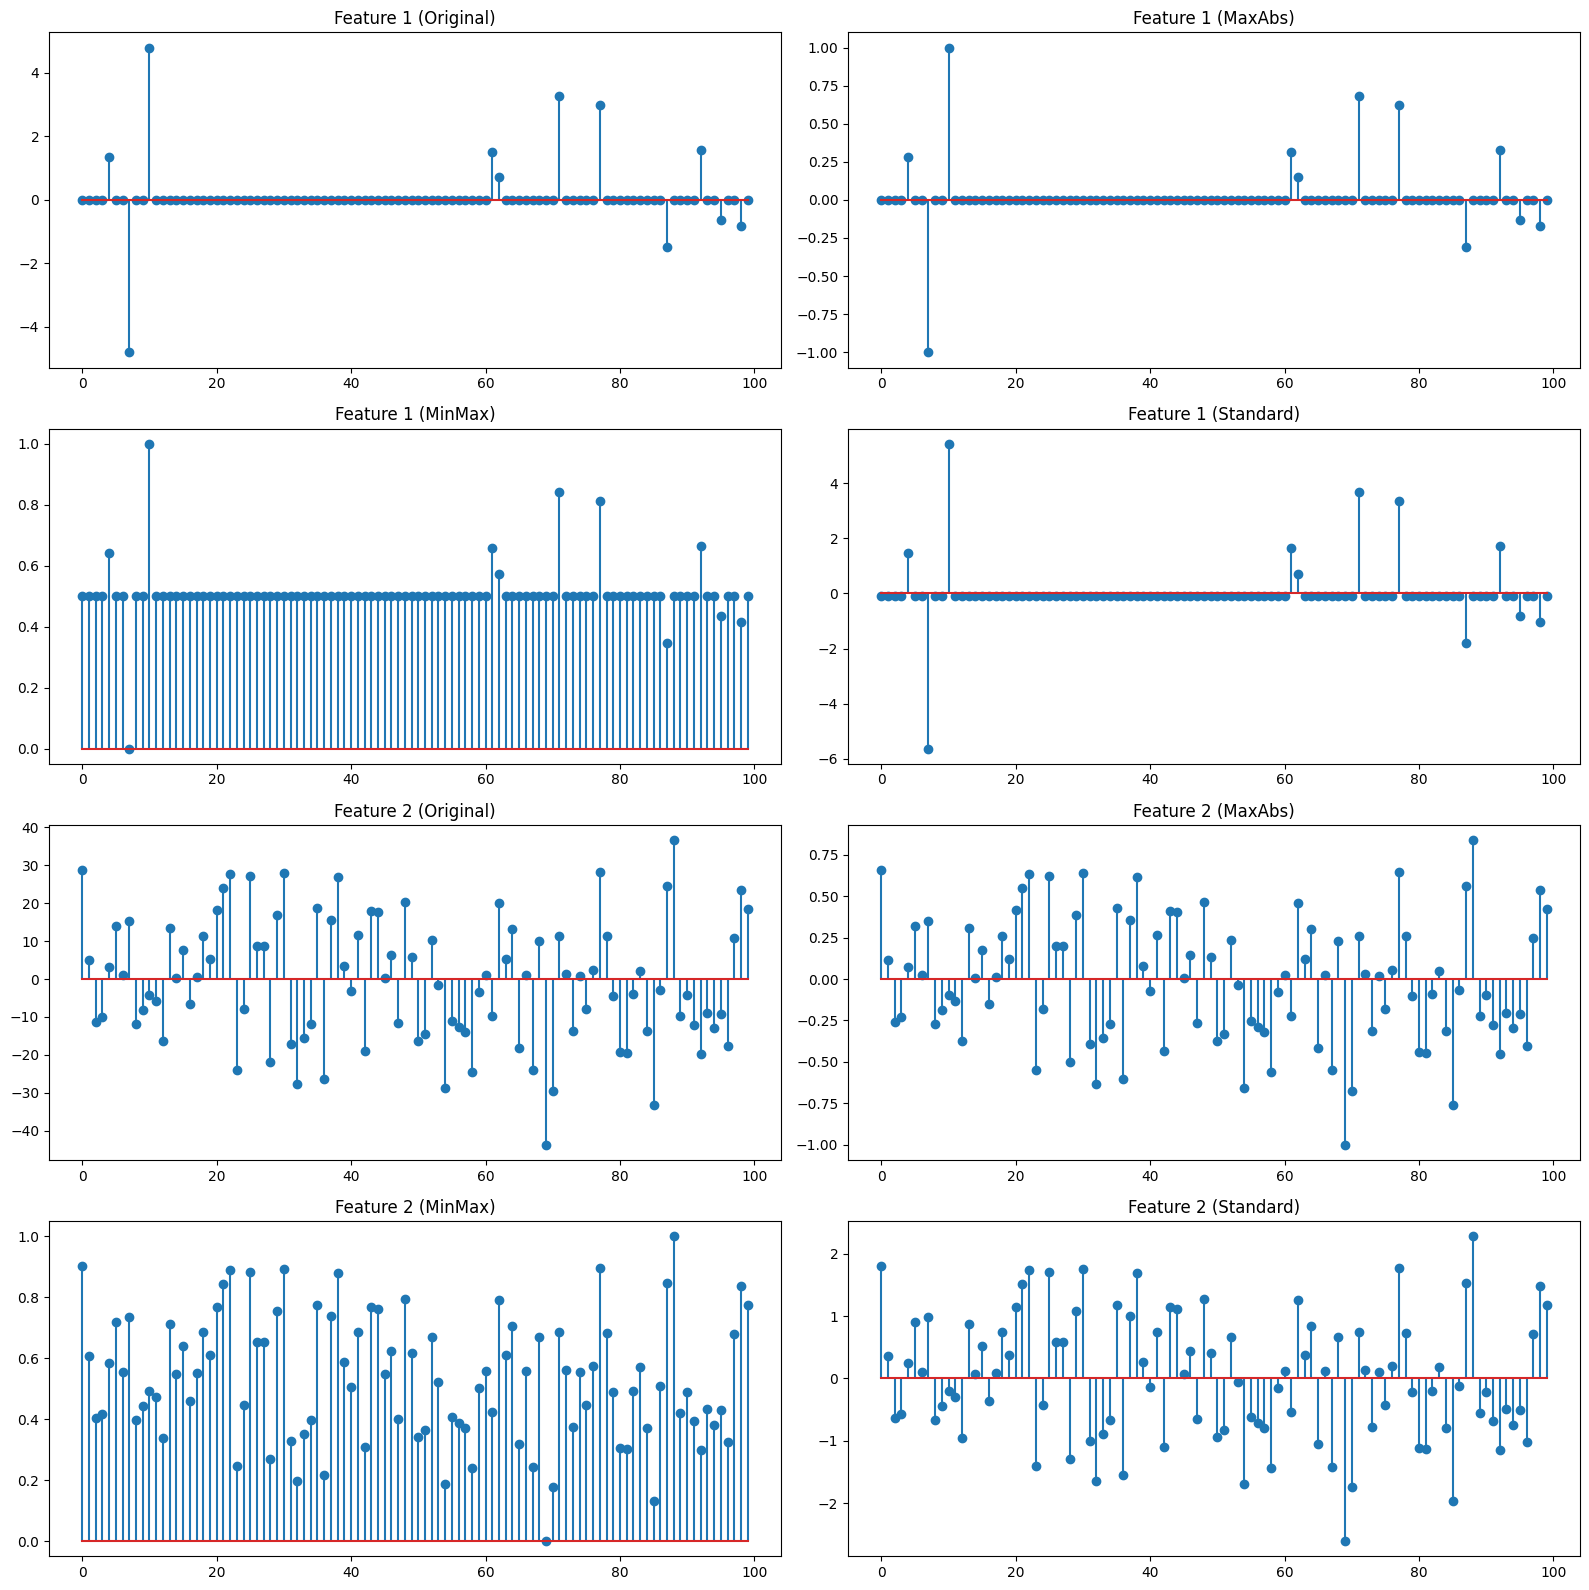

In [ ]:
# generating data
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 10 * np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal


signal_length = 100
num_nonzero = 10
index_no = 220257

sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (index_no % 10) * 2 + 10
if index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
sparse_signal = sparse_signal / 5

epsilon = np.random.normal(0, 15, signal_length)

# feture 1
sparse_maxabs = MaxAbsScaler().fit_transform(sparse_signal.reshape(-1, 1)).flatten()
sparse_minmax = MinMaxScaler().fit_transform(sparse_signal.reshape(-1, 1)).flatten()
sparse_standard = StandardScaler().fit_transform(sparse_signal.reshape(-1, 1)).flatten()

# feature 2 
epsilon_maxabs = MaxAbsScaler().fit_transform(epsilon.reshape(-1, 1)).flatten()
epsilon_minmax = MinMaxScaler().fit_transform(epsilon.reshape(-1, 1)).flatten()
epsilon_standard = StandardScaler().fit_transform(epsilon.reshape(-1, 1)).flatten()

plt.figure(figsize=(16, 16))



# feature 1 plotting
plt.subplot(4, 2, 1); plt.title("Feature 1 (Original)")
plt.stem(sparse_signal)
plt.subplot(4, 2, 2); plt.title("Feature 1 (MaxAbs)")
plt.stem(sparse_maxabs)

plt.subplot(4, 2, 3); plt.title("Feature 1 (MinMax)")
plt.stem(sparse_minmax)
plt.subplot(4, 2, 4); plt.title("Feature 1 (Standard)")
plt.stem(sparse_standard)

# feature 2 plotting
plt.subplot(4, 2, 5); plt.title("Feature 2 (Original)")
plt.stem(epsilon)
plt.subplot(4, 2, 6); plt.title("Feature 2 (MaxAbs)")
plt.stem(epsilon_maxabs)

plt.subplot(4, 2, 7); plt.title("Feature 2 (MinMax)")
plt.stem(epsilon_minmax)
plt.subplot(4, 2, 8); plt.title("Feature 2 (Standard)")
plt.stem(epsilon_standard)

plt.tight_layout()
plt.show()